# 05 衡量回归算法的标准

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## 波士顿房产预测

In [2]:
boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
x = boston.data[:, 5] # 只是用房间数量

In [6]:
x.shape

(506,)

In [7]:
y = boston.target

In [8]:
y.shape

(506,)

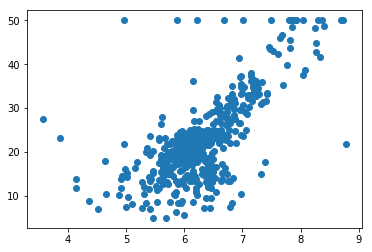

In [9]:
plt.scatter(x, y)

In [10]:
np.max(y)

50.0

In [11]:
x = x[y < 50.0]
y = y[y < 50.0]

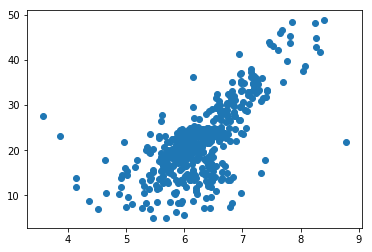

In [12]:
plt.scatter(x, y)

### 使用简单线性回归法

In [13]:
from playML.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [14]:
x_train.shape

(392,)

In [15]:
x_test.shape

(98,)

In [16]:
from playML.SimpleLinearRegression import SimpleLinearRegression

In [18]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [19]:
reg.a_

7.860854356268956

In [20]:
reg.b_

-27.45934280670555

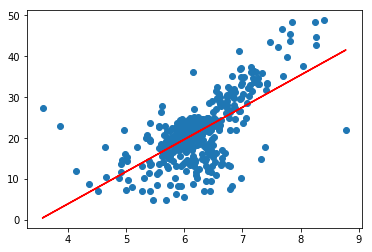

In [21]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')

In [22]:
y_predict = reg.predict(x_test)

### MSE 均方误差 

In [25]:
mse_test = np.sum((y_predict - y_test) ** 2) / len(y_predict)
mse_test

24.15660213438743

### RMSE 均方根误差

In [26]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846634

### MAE 平均绝对误差

In [28]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

3.5430974409463873

In [30]:
from playML.metrics import mean_squared_error
from playML.metrics import root_mean_squared_error
from playML.metrics import mean_absolute_error

In [31]:
mean_squared_error(y_test, y_predict)

24.15660213438743

In [32]:
root_mean_squared_error(y_test, y_predict)

4.914936635846634

In [33]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

### scikit-learn 中的 MSE 和 MAE

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [35]:
mean_squared_error(y_test, y_predict)

24.15660213438743

In [36]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

In [37]:
sqrt(mean_squared_error(y_test, y_predict))

4.914936635846634